<a href="https://colab.research.google.com/github/alexrods/California_Housing_prices/blob/main/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing, predict median house value

In this project, i´ll compare the result of linear regression using distinct feature scale methods

## Preparing data

In [ ]:
#Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

Import dataset
 from California Housing https://www.kaggle.com/camnugent/california-housing-prices?select=housing.csv

In [ ]:
df = pd.read_csv('housing.csv')
df.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [ ]:
# Looking for NA values

df.isna().value_counts() 

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
False      False     False               False        False           False       False       False          False               False              20433
                                                      True            False       False       False          False               False                207
dtype: int64

In [ ]:
# NA values found in column "total_bedrooms", I proceed to replace with median 

median = df["total_bedrooms"].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median)

In [ ]:
# Checking the dataset it's clean of Na values

df.isna().value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
False      False     False               False        False           False       False       False          False               False              20640
dtype: int64

## Data visualizations

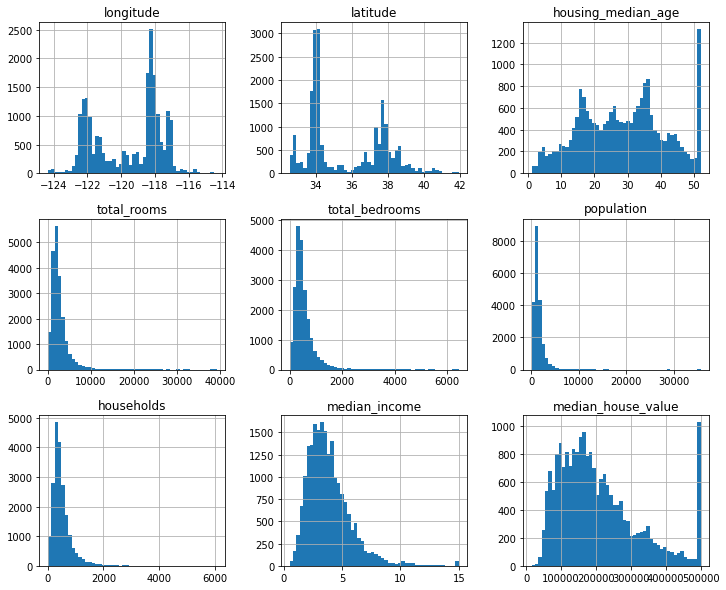

In [ ]:
# Have a look of the data distribution

df.hist(bins=50, figsize=(12,10))
plt.show()

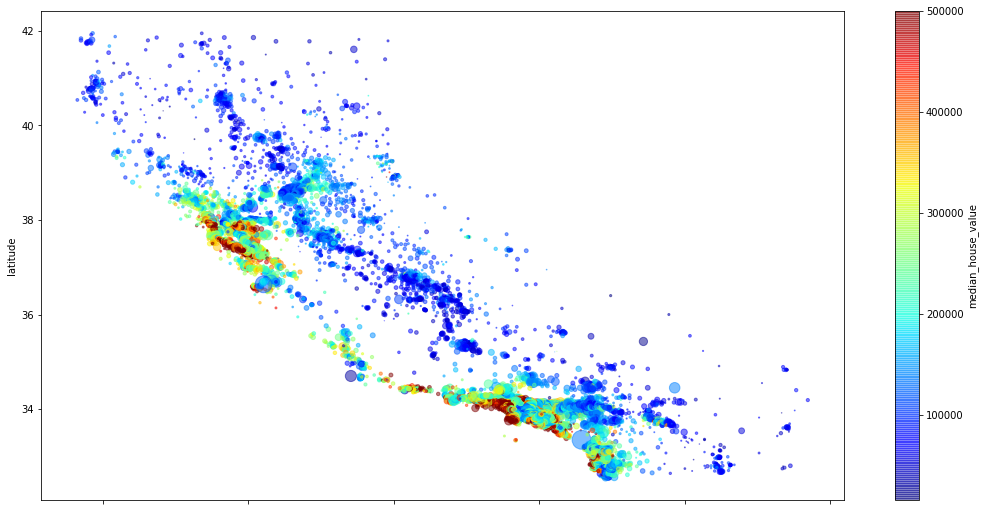

In [ ]:
# longitude, latitude, scatterplot

df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
                  s=df['population']/100, c='median_house_value', cmap=plt.get_cmap("jet"), colorbar=True, figsize=(18,9))

plt.show()

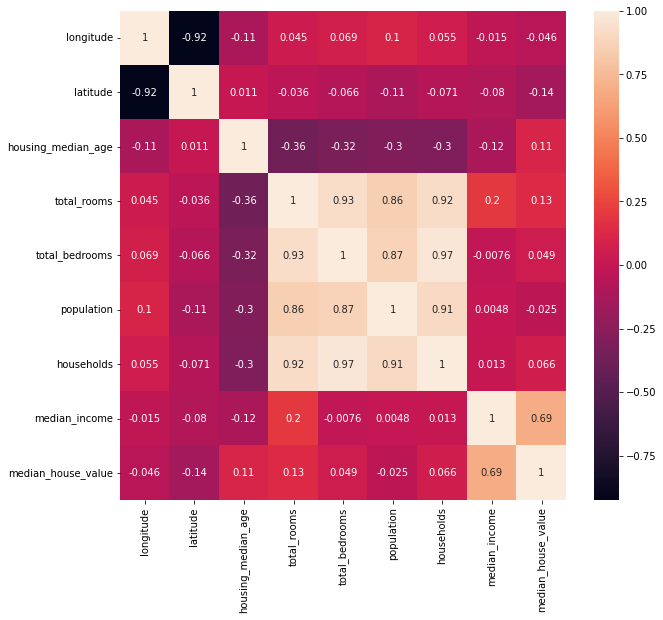

In [ ]:
# Covariance matrix

plt.subplots(figsize=(10,9))
sns.heatmap(df.corr(), annot=True)

## Features engineering

In [ ]:
# New features

df['rooms_per_households'] = df['total_rooms'] / df['households']
df['bedrooms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [ ]:
# Looking for correlations of  features with "median_house_value"

corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_households        0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.233303
Name: median_house_value, dtype: float64

I can look the "median_income", is the feature with most correlation on "median_house_value"

### Preparation of categorical data





In [ ]:
# sepatate numerical and categorical features

df_numerical = df.drop(['ocean_proximity'], axis=1)
df_categorical = df['ocean_proximity']

I'll use a *OneHotEncoder* method for transform the categorical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()

In [ ]:
df_cat_encode = encoder.fit_transform(df_categorical.to_numpy().reshape(-1,1))

In [ ]:
# save the categorical features in a new dataframe

df_categorical_encoded = pd.DataFrame(df_cat_encode.toarray(), columns=df_categorical.unique())

In [ ]:
# separate features and target columns

features = df_numerical.drop(['median_house_value'], axis=1)
target = df_numerical['median_house_value']

In [ ]:
# concat numerical and categorical data

features_fill = pd.concat([features, df_categorical_encoded], axis=1)
features_fill.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_per_rooms,population_per_household,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0


## Scale processing





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_fill, target, test_size=0.2)

### Scale with tanh  function


I'll to scale the numerical features, therefore i use as filter the features columns

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
y_train_scaled = y_train.copy()
y_test_scaled = y_test.copy()

This is the function for scale the data:

$$
featureScaled = tanh\left(\frac{feature}{mean(feature)}\right)
$$


I scale the train and data separated because i don't want to pass information of the train to test

In [ ]:
df_scaled = df.drop(['ocean_proximity'], axis=1)

In [ ]:
for col in df_scaled.columns:
    df_scaled[col] = np.tanh(df_scaled[col] / np.mean(df_scaled[col]))

In [ ]:
#df_scaled.hist(bins=50, figsize=(12,10))
#plt.show()

In [ ]:
for col in features.columns:
        X_train_scaled[col] = np.tanh(X_train_scaled[col] / np.mean(X_train_scaled[col]))

X_train_scaled = X_train_scaled.to_numpy()
y_train_scaled = np.tanh(y_train_scaled / np.mean(y_train_scaled))
y_train_scaled = y_train_scaled.to_numpy().reshape(-1,1)

In [ ]:
for col in features.columns:
        X_test_scaled[col] = np.tanh(X_test_scaled[col]/np.mean(X_test_scaled[col]))
X_test_scaled = X_test_scaled.to_numpy()
y_test_scaled = np.tanh(y_test_scaled / np.mean(y_test_scaled))
y_test_scaled = y_test_scaled.to_numpy().reshape(-1,1)

### Scale with StandarScaler

In [ ]:
standar_scaler = StandardScaler()

X_train_standar = standar_scaler.fit_transform(X_train)
#y_train_standar = standar_scaler.fit_transform(y_train.to_numpy().reshape(-1,1))
X_test_standar = standar_scaler.fit_transform(X_test)
#y_test_standar = standar_scaler.fit_transform(y_test.to_numpy().reshape(-1,1))

### Scale with MinMaxScaler

In [ ]:
min_max = MinMaxScaler()

X_train_minmax = min_max.fit_transform(X_train)
#y_train_minmax= min_max.fit_transform(y_train.to_numpy().reshape(-1,1))
X_test_minmax = min_max.fit_transform(X_test)
#y_test_minmax = min_max.fit_transform(y_test.to_numpy().reshape(-1,1))

### Scale with Robust scaler

In [ ]:
robust = RobustScaler()

X_train_robust = robust.fit_transform(X_train)
#y_train_robust = robust.fit_transform(y_train.to_numpy().reshape(-1,1))
X_test_robust = robust.fit_transform(X_test)
#y_test_robust = robust.fit_transform(y_test.to_numpy().reshape(-1,1))

### Scale with Power Transform


In [ ]:
pt = PowerTransformer()

X_train_power = pt.fit_transform(X_train)
#y_train_power = pt.fit_transform(y_train.to_numpy().reshape(-1,1))
X_test_power = pt.fit_transform(X_test)
#y_test_power = pt.fit_transform(y_test.to_numpy().reshape(-1,1))                                 

## Machine learning models

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# create a function for evaluate the distincts linear regression methods

def data_evaluation(x_train, x_test, y_train, y_test):
    if type(x_train) != np.ndarray:
        x_train = x_train.to_numpy()
        x_test = x_test.to_numpy()
        y_train = y_train.to_numpy().reshape(-1,1)
        y_test = y_test.to_numpy().reshape(-1,1)
   
    models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
    error_results = []
    for model in models:
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        error = np.sqrt(mean_squared_error(y_test, predictions))
        error_results.append({"model": model,
                              "error": error})
    sorted_values = sorted(error_results, key= lambda k:k['error'])
    best_score = sorted_values[0]

    return best_score

In [ ]:
# evaluate the model with the different scales

error_predict_tanh_scale = data_evaluation(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)
error_predict_standar_scale = data_evaluation(X_train_standar, X_test_standar, y_train, y_test)
error_predict_minmax_scale = data_evaluation(X_train_minmax, X_test_minmax, y_train, y_test)
error_predict_robust_scale = data_evaluation(X_train_robust, X_test_robust, y_train, y_test)
error_predict_power_scale = data_evaluation(X_train_power, X_test_power, y_train, y_test)

In [ ]:
print(f'''TanhScale mse: {error_predict_tanh_scale}\n\nStandarScale rmse: {error_predict_standar_scale}\n\n
MinMaxScale rmse: {error_predict_minmax_scale}\n\nRobustScale rmse: {error_predict_robust_scale}\n\n
PowerTransform rmse: {error_predict_power_scale}''')

TanhScale mse: {'model': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False), 'error': 0.08168145675262488}

StandarScale rmse: {'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'error': 69514.1250856178}


MinMaxScale rmse: {'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'error': 74910.19328654942}

RobustScale rmse: {'model': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nod

It can see that the "rmse" tanh scale values get the lower value, but this numbers don't represent a considerable value, need to rescale.

In [ ]:
print("StandarScaler rescaled rmse: ", error_predict_standar_scale['error'])
print("\nMinMaxScaler  rescaled rmse: ", error_predict_minmax_scale['error'])
print("\nRobustScaler  rescaled rmse:", error_predict_robust_scale['error'])
print("\nPowerScaler   rescaled rmse:", error_predict_power_scale['error'])

# for rescale the tanh scale, i make the inverse process

print("\nTanhScaler    rescaled rmse: ", np.arctanh(error_predict_tanh_scale['error']) * np.mean(y_test))

StandarScaler rescaled rmse:  69514.1250856178

MinMaxScaler  rescaled rmse:  74910.19328654942

RobustScaler  rescaled rmse: 50704.62240020218

PowerScaler   rescaled rmse: 65415.5391328803

TanhScaler    rescaled rmse:  17116.365132981227


It's clear, the result with Tanh scale is better